In [121]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style('darkgrid')
import re

import warnings
warnings.filterwarnings('ignore')

In [122]:
df0 = pd.read_csv('df_missing_values.csv')

In [123]:
df = df0.copy()

In [124]:
df.describe()

age         price             km         hp_kw  \
count  14813.000000  14813.000000   14813.000000  14813.000000   
mean       2.385202  18111.465199   32009.105987     88.321137   
std        1.116192   7427.119157   36836.973453     26.703862   
min        1.000000     13.000000       0.000000      1.000000   
25%        1.000000  12900.000000    2627.000000     66.000000   
50%        2.000000  16950.000000   20413.000000     85.000000   
75%        3.000000  21900.000000   45900.000000    101.000000   
max        4.000000  74600.000000  317000.000000    294.000000   

       previous_owners  displacement_in_cc     cylinders        weight  \
count     14813.000000        14813.000000  14813.000000  14813.000000   
mean          0.985486         1425.733815      3.801931   1343.002633   
std           0.332126          335.833418      0.407934    205.910256   
min           0.000000            1.000000      1.000000      1.000000   
25%           1.000000         1229.000000      4.000000   1163.000000   
50%           1.000000         1461.000000      4.000000   1308.000000   
75%           1.000000         1598.000000      4.000000   1487.000000   
max           4.000000        16000.000000      8.000000   2471.000000   

        nr_of_doors   nr_of_seats         gears  consumption_comb(l/100_km)  \
count  14813.000000  14813.000000  14813.000000                14813.000000   
mean       4.663201      4.949639      5.941065                    4.827219   
std        0.638612      0.465124      0.809725                    1.265619   
min        1.000000      2.000000      1.000000                    0.200000   
25%        4.000000      5.000000      5.000000                    4.000000   
50%        5.000000      5.000000      6.000000                    4.800000   
75%        5.000000      5.000000      6.000000                    5.400000   
max        7.000000      7.000000     50.000000                   55.000000   

       consumption_city(l/100_km)  consumption_country(l/100_km)  
count                14813.000000                   14813.000000  
mean                     5.798852                       4.205846  
std                      1.877306                       1.115777  
min                      2.000000                       2.000000  
25%                      4.600000                       3.700000  
50%                      5.700000                       4.200000  
75%                      6.800000                       4.500000  
max                     66.000000                      44.000000

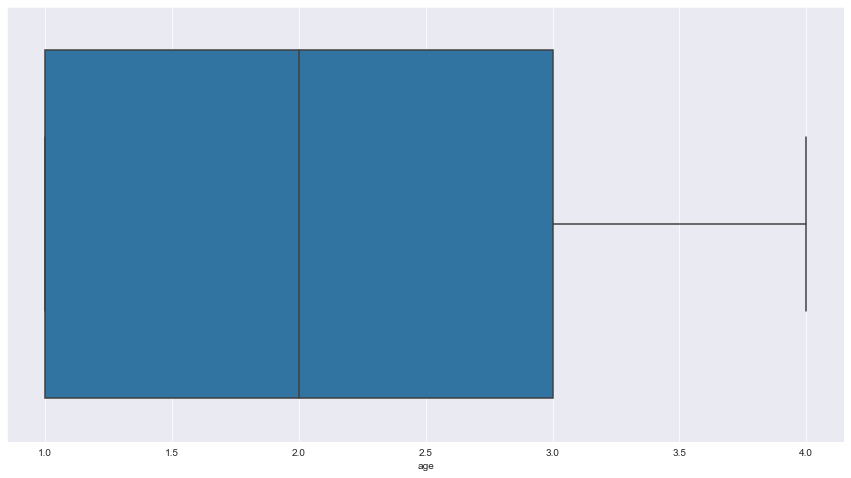

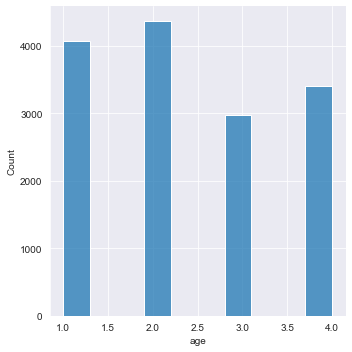

In [125]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = df['age'])
sns.displot(df.age, bins = 10, kde = False);

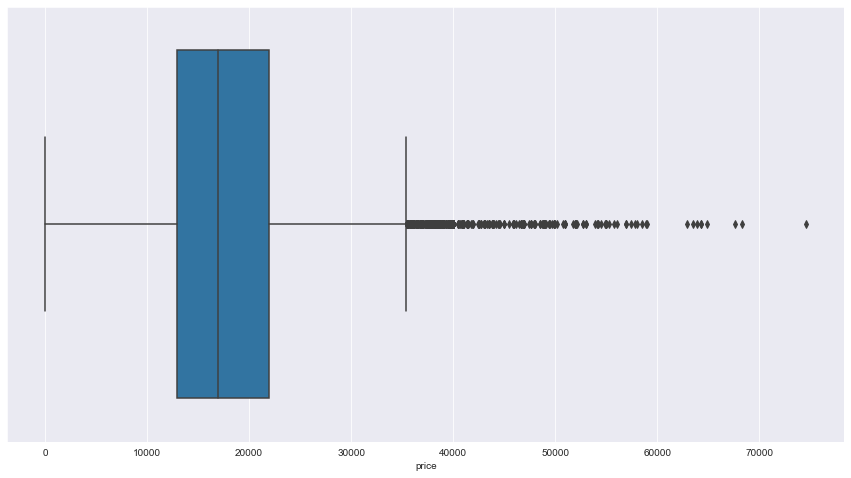

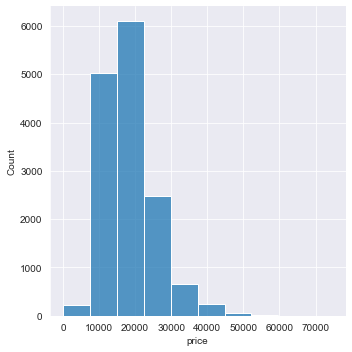

In [126]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = df['price'])
sns.displot(df.price, bins = 10, kde = False);

In [127]:
df['price_log'] = np.log(df['price'])

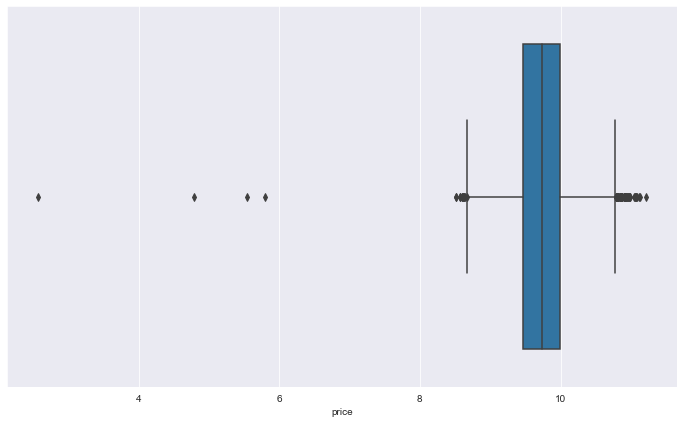

In [128]:
plt.figure(figsize = (12, 7))
sns.boxplot(x = np.log(df.price));

In [129]:
Q1 = df.price_log.quantile(0.25)
Q3 = df.price_log.quantile(0.75)

In [130]:
IQR = Q3 - Q1

In [131]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [132]:
df.loc[(df.price_log > upper_lim)]

make   model  age  \
3367      Audi      A3  2.0   
3370      Audi      A3  1.0   
3372      Audi      A3  2.0   
3373      Audi      A3  2.0   
3374      Audi      A3  2.0   
...        ...     ...  ...   
14772  Renault  Espace  1.0   
14773  Renault  Espace  1.0   
14774  Renault  Espace  1.0   
14775  Renault  Espace  1.0   
14777  Renault  Espace  1.0   

                                       short_description body_type  price  \
3367                  RS 3 SPB 2.5 TFSI quattro S tronic    Sedans  64900   
3370                           RS 3 SPB Quattro S Tronic    Sedans  62900   
3372      RS 3 SPB 2.5 TFSI quattro S tronic ! FAST VOLL    Sedans  56900   
3373                  RS 3 SPB 2.5 TFSI quattro S tronic    Sedans  58500   
3374      S3 SB 2,0 TFSI - Matrix - Pano - VC - Garantie    Sedans  58990   
...                                                  ...       ...    ...   
14772           INITIALE Paris BLUE dCi 200 EDC ABS NAVI       Van  48800   
14773                                 1.8 TCe Intens 5p.       Van  48765   
14774              Initiale Paris ENERGY TCe 200 EDC LED       Van  48720   
14775  Initiale Paris 2.0 BLUE dCi 200 EDC 7-Sitzer L...       Van  48490   
14777                    BLUE dCi 200 EDC INITIALE PARIS    Sedans  48498   

            km  hp_kw     fuel            type  ...  \
3367   35000.0  294.0  Benzine            Used  ...   
3370     700.0  294.0  Benzine            Used  ...   
3372    5200.0  294.0  Benzine            Used  ...   
3373   10000.0  294.0  Benzine            Used  ...   
3374    7500.0  228.0  Benzine            Used  ...   
...        ...    ...      ...             ...  ...   
14772     15.0  147.0   Diesel             New  ...   
14773     11.0  165.0  Benzine             New  ...   
14774   1506.0  147.0   Diesel   Demonstration  ...   
14775      5.0  147.0   Diesel  Pre-registered  ...   
14777   3000.0  147.0   Diesel   Demonstration  ...   

                                   entertainment_&_media  \
3367                                             'Radio'   
3370                                'Bluetooth', 'Radio'   
3372   'Bluetooth', 'CD player', 'Digital radio', 'Ha...   
3373                                             'Radio'   
3374   'Bluetooth', 'CD player', 'Hands-free equipmen...   
...                                                  ...   
14772  'Bluetooth', 'Hands-free equipment', 'MP3', 'USB'   
14773                           'Digital radio', 'Radio'   
14774  'Digital radio', 'On-board computer', 'Sound s...   
14775  'Bluetooth', 'Digital radio', 'Hands-free equi...   
14777  'Bluetooth', 'Digital radio', 'Hands-free equi...   

                                                  extras  \
3367                                      'Alloy wheels'   
3370                                      'Alloy wheels'   
3372   'Alloy wheels', 'Shift paddles', 'Sport packag...   
3373                                      'Alloy wheels'   
3374   'Alloy wheels', 'Sport package', 'Sport seats'...   
...                                                  ...   
14772  'Alloy wheels', 'Sport suspension', 'Touch scr...   
14773                    'Alloy wheels', 'Voice Control'   
14774                                     'Touch screen'   
14775                                     'Alloy wheels'   
14777                    'Alloy wheels', 'Voice Control'   

                                       safety_&_security  gears    seat_cover  \
3367   'Adaptive Cruise Control', 'Alarm system', 'Ce...    7.0         Cloth   
3370   'ABS', 'Adaptive Cruise Control', 'Alarm syste...    7.0         Cloth   
3372   'ABS', 'Adaptive Cruise Control', 'Adaptive he...    7.0  Full leather   
3373   'Adaptive Cruise Control', 'Alarm system', 'Ce...    7.0         Cloth   
3374   'ABS', 'Adaptive Cruise Control', 'Adaptive he...    7.0  Full leather   
...                                                  ...    ...           ...   
14772  'ABS', 'Blind spot monitor', 'Dayti

In [133]:
df.loc[(df.price_log < lower_lim)]

make  model  age                               short_description  \
3034      Audi     A3  2.0                2.0 TDI Sportback quattro design   
5700      Opel  Astra  2.0  1.6 D (CDTI) Start/Stop Sports Tourer Business   
8064      Opel  Corsa  2.0             1.4 (ecoFLEX) Start/Stop Innovation   
8287      Opel  Corsa  4.0                          1.3 CDTI 3 porte n-Joy   
8288      Opel  Corsa  4.0      1.3 CDTI Van ECOFLEX 2 POSTI ++AZIENDALE++   
8289      Opel  Corsa  4.0                           1.3CDTI Expression 75   
8290      Opel  Corsa  4.0                       Van 1.3CDTI Expression 75   
8291      Opel  Corsa  4.0       E Edition ecoFlex Klima PDC + Winterräder   
8292      Opel  Corsa  4.0                                   Color Edition   
8293      Opel  Corsa  4.0                       Van 1.3CDTI Expression 75   
8294      Opel  Corsa  4.0                                   LICHTE VRACHT   
8295      Opel  Corsa  1.0     1.0 Turbo 120 Jaar Edition / 120 EURO p/mnd   
8296      Opel  Corsa  1.0   Corsa1.0 Turbo 90 Pk OPC Line | Private Lease   
12844  Renault   Clio  4.0                   IV 1.5 dci 75 cv 2016 societé   
12845  Renault   Clio  4.0                             1.5 dCi Authentique   
12852  Renault   Clio  4.0                                   1.5 dCi euro6   

           body_type  price        km  hp_kw     fuel  type  ...  \
3034   Station wagon   5555    5558.0  110.0   Diesel  Used  ...   
5700   Station wagon    255    5563.0  100.0   Diesel  Used  ...   
8064          Sedans     13     123.0   66.0  Benzine  Used  ...   
8287          Sedans   5499  143000.0   55.0   Diesel  Used  ...   
8288     Transporter   5600  112413.0   55.0   Diesel  Used  ...   
8289         Compact   5490  157000.0   55.0   Diesel  Used  ...   
8290     Transporter   5450   73000.0   55.0   Diesel  Used  ...   
8291         Compact   5300  173021.0   55.0   Diesel  Used  ...   
8292         Compact   4990   79000.0   66.0  Benzine  Used  ...   
8293     Transporter   5250   80000.0   55.0   Diesel  Used  ...   
8294          Sedans   4950  179521.0   70.0   Diesel  Used  ...   
8295         Compact    120      12.0   66.0  Benzine   New  ...   
8296         Compact    331      10.0   66.0  Benzine   New  ...   
12844        Compact   5800   74000.0   55.0   Diesel  Used  ...   
12845         Sedans   5700  140000.0   55.0   Diesel  Used  ...   
12852         Sedans   5445  123000.0   55.0   Diesel  Used  ...   

                                   entertainment_&_media  \
3034   'Bluetooth', 'CD player', 'MP3', 'On-board com...   
5700   'Bluetooth', 'Hands-free equipment', 'On-board...   
8064   'Bluetooth', 'CD player', 'Hands-free equipmen...   
8287   'Bluetooth', 'CD player', 'MP3', 'On-board com...   
8288                                                 NaN   
8289                                                 NaN   
8290                         'Bluetooth', 'Radio', 'USB'   
8291                    'CD player', 'On-board computer'   
8292   'Bluetooth', 'Hands-free equipment', 'On-board...   
8293                         'Bluetooth', 'Radio', 'USB'   
8294   'Bluetooth', 'CD player', 'MP3', 'On-board com...   
8295       'Digital radio', 'On-board computer', 'Radio'   
8296   'Hands-free equipment', 'On-board computer', '...   
12844                                                NaN   
12845  'Bluetooth', 'CD player', 'On-board computer',...   
12852                                            'Radio'   

                                   extras  \
3034      'Alloy wheels', 'Voice Control'   
5700                          'Roof rack'   
8064                       'Alloy wheels'   
8287      'Alloy wheels', 'Trailer hitch'   
8288                                  NaN   
8289                                  NaN   
8290                                  NaN   
8291                                  NaN   
8292       'Alloy wheels', 'Touch screen'   
8293                                  NaN   
8294      

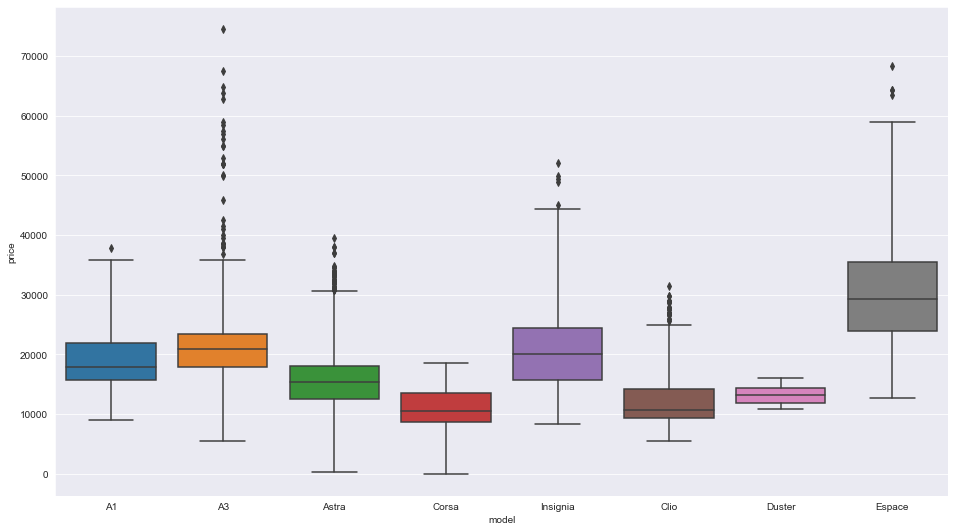

In [134]:
plt.figure(figsize = (16, 9))
sns.boxplot(x='model', y='price', data=df, whis=2.3);

In [135]:
df['price'].sort_values()

8064        13
8295       120
5700       255
8296       331
8294      4950
         ...  
14725    64332
3367     64900
3429     67600
14723    68320
3428     74600
Name: price, Length: 14813, dtype: int64

In [136]:
df.drop(index=[8065,8296,5700,8297], axis=0, inplace=True)

In [137]:
#outlier_index_up = df.loc[(df.price_log > upper_lim)].index
#outlier_index_up

In [138]:
#outlier_index_low = df.loc[(df.price_log < lower_lim)].index
#outlier_index_low

In [139]:
df.shape

(14809, 32)

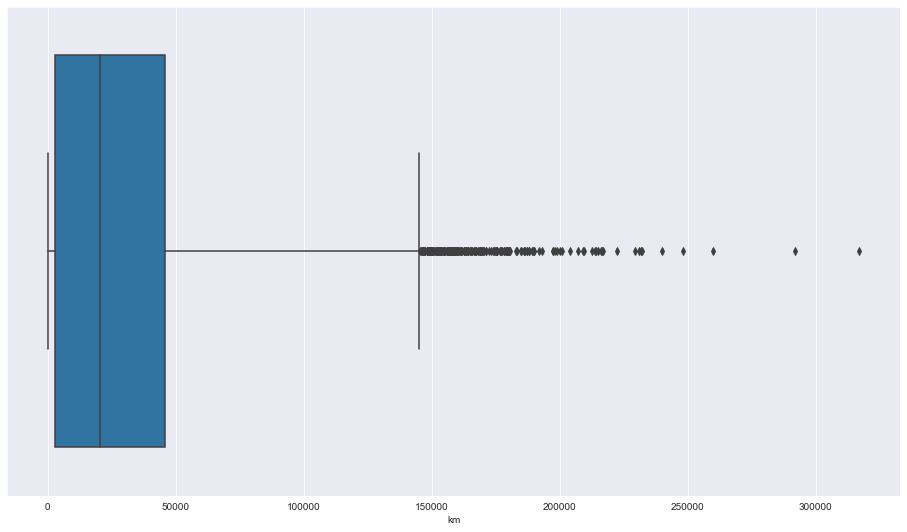

In [140]:
plt.figure(figsize = (16, 9))
sns.boxplot(x='km', data=df, whis=2.3);

In [141]:
# km deki outlier lar kontrol edilecek

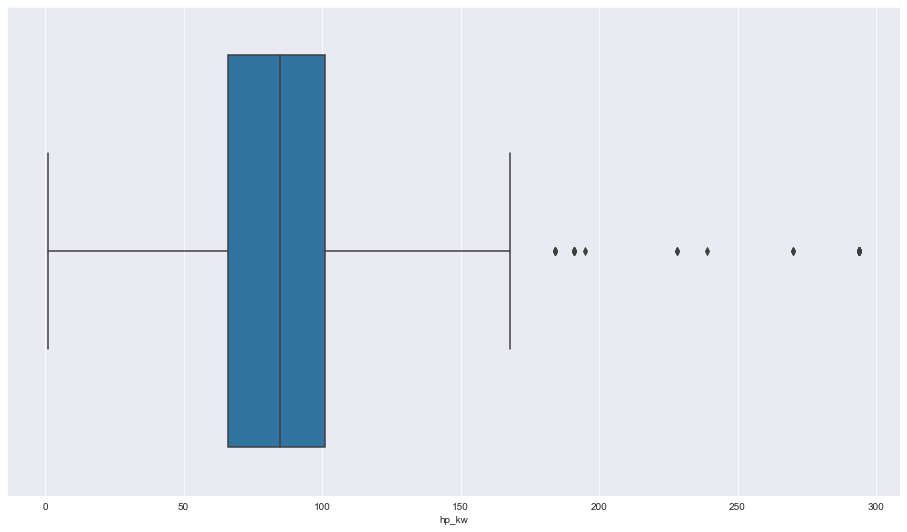

In [142]:
plt.figure(figsize = (16, 9))
sns.boxplot(x='hp_kw', data=df, whis=2.3);

In [143]:
df.loc[(df['hp_kw'] < 40), 'hp_kw'] = np.nan

In [144]:
df['hp_kw'].fillna(df.groupby(['make', 'model', 'age', 'fuel', 'body_type'])['hp_kw'].transform(lambda x: x.mode()[0]), inplace=True)

In [145]:
df[(df['hp_kw'] < 40)]

Empty DataFrame
Columns: [make, model, age, short_description, body_type, price, km, hp_kw, fuel, type, previous_owners, gearing_type, displacement_in_cc, cylinders, weight, emission_class, body_color, paint_type, nr_of_doors, nr_of_seats, drive_chain, comfort_&_convenience, entertainment_&_media, extras, safety_&_security, gears, seat_cover, consumption_comb(l/100_km), consumption_city(l/100_km), consumption_country(l/100_km), vat, price_log]
Index: []

[0 rows x 32 columns]

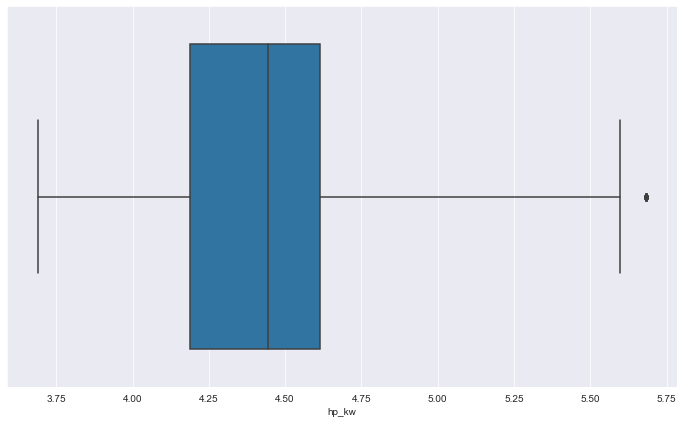

In [146]:
plt.figure(figsize = (12, 7))
sns.boxplot(x = np.log(df.hp_kw), whis=2.5);

In [147]:
df.drop('price_log', axis= 1, inplace= True)

## displacement_in_cc

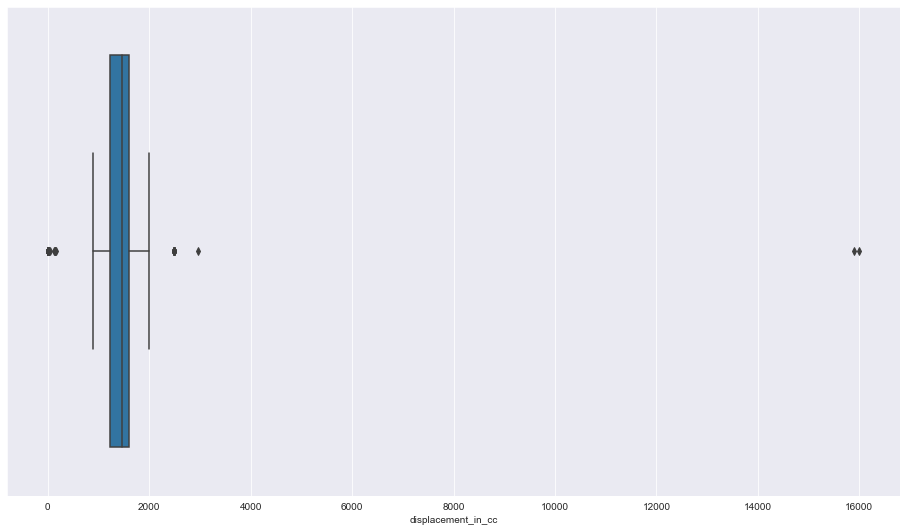

In [148]:
plt.figure(figsize = (16, 9))
sns.boxplot(x='displacement_in_cc', data=df, whis=2.3);

In [149]:
df.sort_values(by=["displacement_in_cc"], ascending=False)["displacement_in_cc"].head(5)

10272    16000.0
6689     15898.0
10117     2967.0
3383      2480.0
3367      2480.0
Name: displacement_in_cc, dtype: float64

In [150]:
df.sort_values(by=["displacement_in_cc"], ascending=True)["displacement_in_cc"].head(55)

13363      1.0
11751      1.0
11753      1.0
11805      1.0
11849      1.0
11905      1.0
11976      1.0
11994      1.0
11995      1.0
12009      1.0
12012      1.0
12016      1.0
12022      1.0
12024      1.0
12026      1.0
13334      1.0
12041      1.0
12060      1.0
12073      1.0
12074      1.0
12979      1.0
13362      1.0
13367      1.0
13368      1.0
13369      1.0
13370      1.0
13372      1.0
13373      1.0
13374      1.0
13375      1.0
13376      1.0
12049      1.0
11736      1.0
12007      1.0
11725      1.0
11719      1.0
13260      2.0
9911       2.0
12987     54.0
9596     122.0
7314     139.0
7315     139.0
7316     139.0
7317     139.0
7606     140.0
14486    160.0
12752    890.0
13686    898.0
13685    898.0
13688    898.0
13618    898.0
12808    898.0
13687    898.0
13689    898.0
13611    898.0
Name: displacement_in_cc, dtype: float64

In [151]:
outlier_bool_list = df.displacement_in_cc.isin([1, 2, 54, 122, 139, 140, 160, 16000, 15898])

In [152]:
df.loc[outlier_bool_list, "displacement_in_cc"] = np.nan

In [153]:
df.displacement_in_cc.isnull().sum()

48

In [154]:
df['hp_kw'].fillna(df.groupby(['make', 'model', 'age', 'fuel', 'body_type'])['hp_kw'].transform(lambda x: x.mode()[0]), inplace=True)

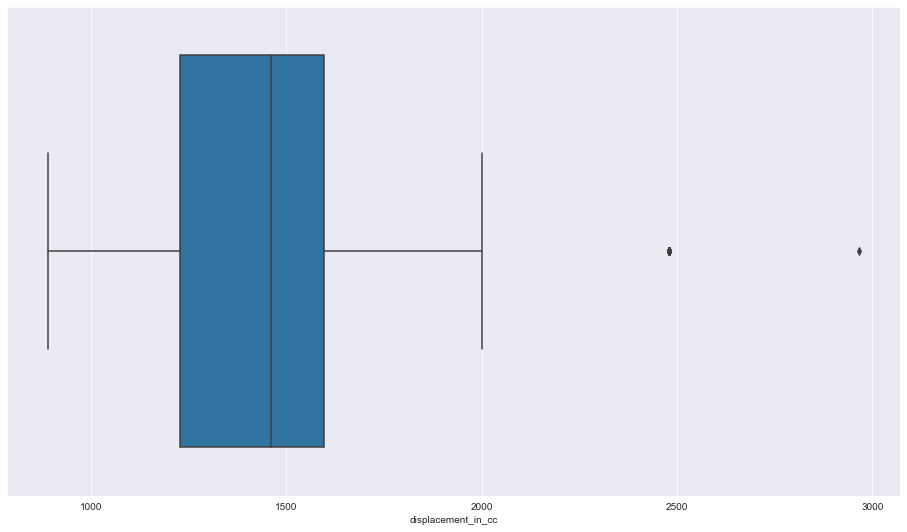

In [155]:
plt.figure(figsize = (16, 9))
sns.boxplot(x='displacement_in_cc', data=df, whis=2.3);

## weight

In [156]:
df.weight.describe()

count    14809.000000
mean      1343.035046
std        205.921534
min          1.000000
25%       1163.000000
50%       1308.000000
75%       1487.000000
max       2471.000000
Name: weight, dtype: float64

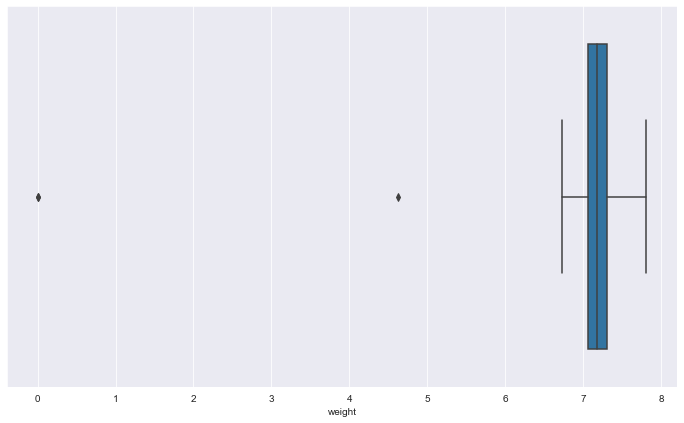

In [157]:
plt.figure(figsize = (12, 7))
sns.boxplot(x = np.log(df.weight), whis=2.5);

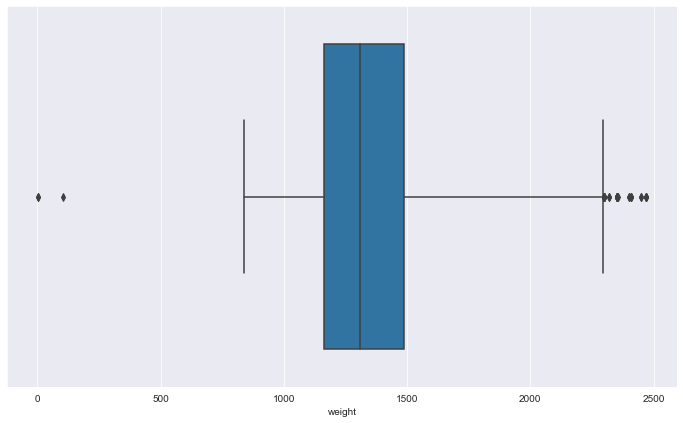

In [158]:
plt.figure(figsize = (12, 7))
sns.boxplot(x = df.weight, whis=2.5);

In [159]:
df.weight.sort_values()

7828        1.0
12005       1.0
1071      102.0
8322      840.0
13361     900.0
          ...  
14128    2471.0
13948    2471.0
14203    2471.0
14170    2471.0
14581    2471.0
Name: weight, Length: 14809, dtype: float64

In [160]:
df.weight.sort_values(ascending= False)

14581    2471.0
14128    2471.0
13948    2471.0
14170    2471.0
14203    2471.0
          ...  
13361     900.0
8322      840.0
1071      102.0
7828        1.0
12005       1.0
Name: weight, Length: 14809, dtype: float64

In [161]:
df.loc[(df['weight'] > 1800) ,:]

make   model  age                            short_description  \
2489      Audi      A3  4.0     Sportback 2.0 TDI CD Attraction S-Tronic   
2534      Audi      A3  3.0     1.6 TDi S tronic GPS APS AIRCO BLUETOOTH   
2569      Audi      A3  4.0     Sportback 1.6 TDI CD S-Tronic Advanced 8   
2576      Audi      A3  3.0          1.6 TDI Sportback S Tronic Business   
2580      Audi      A3  4.0   SPB 1.6 TDI clean diesel S tronic Business   
...        ...     ...  ...                                          ...   
14784  Renault  Espace  1.0                     BLUE dCi 200 EDC LIMITED   
14789  Renault  Espace  1.0                   dCi 200 EDC INITIALE PARIS   
14793  Renault  Espace  1.0  2.0 Blue dCi 200 Initiale Paris EDC (EU6.2)   
14794  Renault  Espace  1.0        ESPACE INITIALE PARIS TCe 225 EDC GPF   
14798  Renault  Espace  1.0              BLUE dCi 160 EDC LIMITED Deluxe   

           body_type  price             km  hp_kw     fuel            type  \
2489          Sedans  18500   99500.000000  110.0   Diesel            Used   
2534          Sedans  17990   85449.000000   81.0   Diesel            Used   
2569          Sedans  17300  108300.000000   81.0   Diesel            Used   
2576          Sedans  17900   35755.000000   81.0   Diesel            Used   
2580          Sedans  17900   47812.000000   81.0   Diesel            Used   
...              ...    ...            ...    ...      ...             ...   
14784  Station wagon  42490    1581.977876  147.0   Diesel             New   
14789  Station wagon  42490   16500.000000  147.0   Diesel   Demonstration   
14793            Van  41395    5000.000000  147.0   Diesel   Demonstration   
14794            Van  41480    8500.000000  165.0  Benzine   Demonstration   
14798  Station wagon  41390      50.000000  118.0   Diesel  Pre-registered   

       ...                              comfort_&_convenience  \
2489   ...                                   Air conditioning   
2534   ...                                   Air conditioning   
2569   ...                                   Air conditioning   
2576   ...                                   Air conditioning   
2580   ...                                   Air conditioning   
...    ...                                                ...   
14784  ...                                   Air conditioning   
14789  ...  'Cruise control', 'Electrically adjustable sea...   
14793  ...                                   Air conditioning   
14794  ...                                   Air conditioning   
14798  ...                                   Air conditioning   

                                   entertainment_&_media  \
2489                                             'Radio'   
2534   'Bluetooth', 'CD player', 'On-board computer',...   
2569                                             'Radio'   
2576   'Bluetooth', 'CD player', 'Hands-free equipmen...   
2580                                'Bluetooth', 'Radio'   
...                                                  ...   
14784  'Bluetooth', 'Hands-free equipment', 'On-board...   
14789  'Bluetooth', 'Digital radio', 'Hands-free equi...   
14793  'Bluetooth', 'Digital radio', 'Hands-free equi...   
14794                                     'Sound system'   
14798  'Bluetooth', 'Digital radio', 'Hands-free equi...   

                                                  extras  \
2489                                                 NaN   
2534               'Alloy wheels', 'Catalytic Converter'   
2569                                      'Alloy wheels'   
2576        'Alloy wheels', 'Roof rack', 'Voice Control'   
2580                                      'Alloy wheels'   
...                                                  ...   
14784                     'Alloy wheels', 'Touch screen'   
14789    'Alloy wheels', 'Touch screen', 'Voice Control'   
14793  'Alloy wheels', 'Catalytic Converter', 'Touch ...   
14794                                     'Alloy wheels'  

In [162]:
df.loc[(df['model'] == 'Espace') , 'weight'].describe()

count     910.000000
mean     1727.652747
std       121.711214
min      1515.000000
25%      1685.000000
50%      1734.000000
75%      1734.000000
max      2471.000000
Name: weight, dtype: float64

In [163]:
df.loc[(df['weight'] < 500) | (df['weight'] > 1800 ) , 'weight'] = np.nan

In [164]:
df.weight.isnull().sum()

313

In [165]:
df['weight'].fillna(df.groupby(['make', 'model', 'age'])['weight'].transform(lambda x: x.mode()[0]), inplace=True)

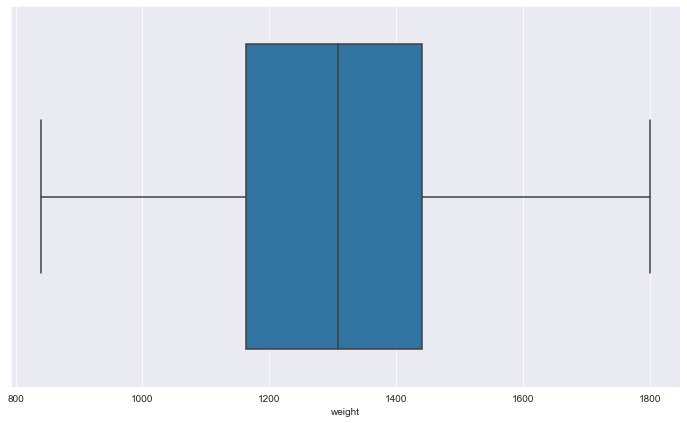

In [166]:
plt.figure(figsize = (12, 7))
sns.boxplot(x = df.weight);

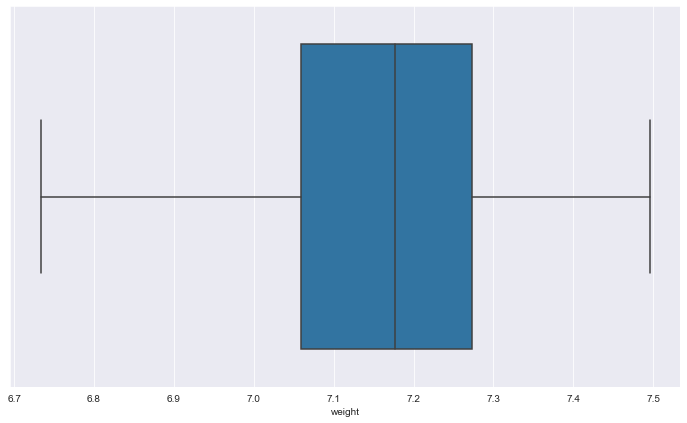

In [167]:
plt.figure(figsize = (12, 7))
sns.boxplot(x = np.log(df.weight), whis=2.5);

## emission_class

In [168]:
df.emission_class.value_counts()

Euro 6          12245
Euro 6d-TEMP     2256
Euro 6c           126
Euro 5             78
Euro 6d            62
Euro 4             42
Name: emission_class, dtype: int64

In [169]:
df.replace({"emission_class" : {"Euro 6d-TEMP": "Euro 6", "Euro 6c": "Euro 6", "Euro 6d": "Euro 6"}}, regex=True, inplace=True)

In [170]:
df.emission_class.value_counts()

Euro 6    14689
Euro 5       78
Euro 4       42
Name: emission_class, dtype: int64

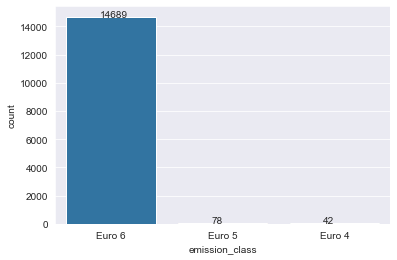

In [171]:
fig, ax = plt.subplots()
ax = sns.countplot(df.emission_class);

for p in ax.patches :
    ax.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()+0.9))

## body_color

In [172]:
df.body_color.value_counts()

Black     3704
Grey      3505
White     3226
Silver    1566
Blue      1359
Red        860
Brown      266
Green      146
Beige       98
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         1
Name: body_color, dtype: int64

In [173]:
df.body_color.replace(['Bronze', 'Orange', 'Gold', 'Violet', 'Yellow', 'Beige', 'Green', 'Brown', 'Red', 'Blue'], 'unpopular', inplace=True)
df.body_color.replace(['Black', 'Grey', 'White', 'Silver'], 'popular', inplace=True)


In [174]:
df.body_color.value_counts()

popular      12001
unpopular     2808
Name: body_color, dtype: int64

In [175]:
# df.drop('body_color', axis= 1, inplace= True)

## paint_type

In [176]:
df.paint_type.value_counts()

Metallic       14455
Uni/basic        348
Perl effect        6
Name: paint_type, dtype: int64

In [177]:
df.paint_type.replace('Perl effect', np.nan, inplace=True)

In [178]:
df['paint_type'].fillna(df.groupby(['make', 'model'])['paint_type'].transform(lambda x: x.mode()[0]), inplace=True)

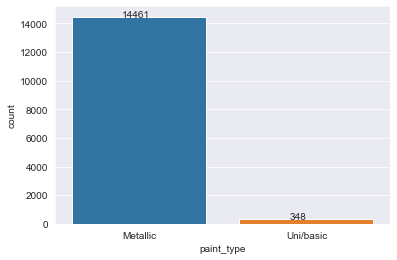

In [179]:
fig, ax = plt.subplots()
ax = sns.countplot(df.paint_type);

for p in ax.patches :
    ax.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()+0.9))

## nr_of_doors

In [180]:
df.nr_of_doors.value_counts()

5.0    10985
4.0     2853
3.0      775
2.0      194
1.0        1
7.0        1
Name: nr_of_doors, dtype: int64

In [181]:
df.nr_of_doors.sort_values()

12864    1.0
9769     2.0
1111     2.0
7949     2.0
7953     2.0
        ... 
5754     5.0
5756     5.0
5744     5.0
14812    5.0
14144    7.0
Name: nr_of_doors, Length: 14809, dtype: float64

In [182]:
df.loc[[12864,14144], 'nr_of_doors']= np.nan

In [183]:
df['nr_of_doors'].fillna(df.groupby(['make', 'model', 'body_type'])['nr_of_doors'].transform(lambda x: x.mode()[0]), inplace=True)

In [184]:
df['nr_of_doors'].isna().sum()

0

In [185]:
df.nr_of_doors.value_counts(dropna= False)

5.0    10987
4.0     2853
3.0      775
2.0      194
Name: nr_of_doors, dtype: int64

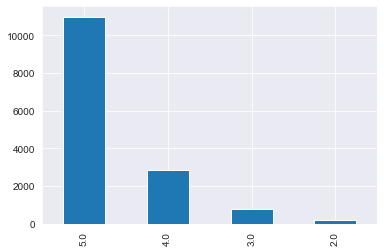

In [186]:
df.nr_of_doors.value_counts().plot.bar();

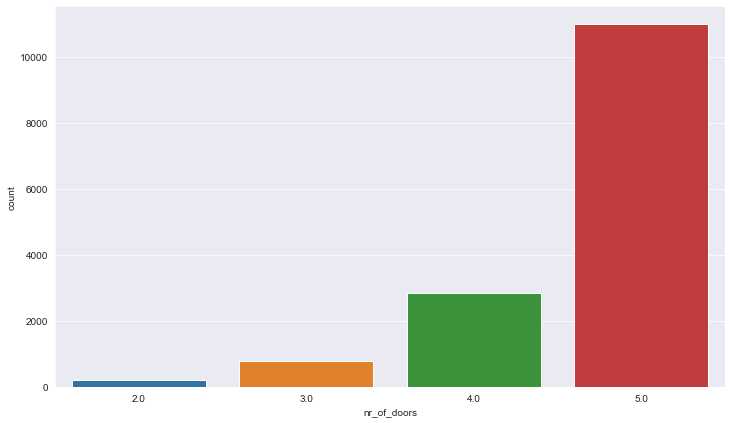

In [187]:
plt.figure(figsize = (12, 7))
sns.countplot(df.nr_of_doors);

## nr_of_seats

In [188]:
df.nr_of_seats.value_counts()

5.0    13310
4.0     1081
7.0      316
2.0       99
6.0        2
3.0        1
Name: nr_of_seats, dtype: int64

In [189]:
df.nr_of_seats.replace([3, 6], np.nan, inplace=True)

In [190]:
df.nr_of_seats.value_counts(dropna=False)

5.0    13310
4.0     1081
7.0      316
2.0       99
NaN        3
Name: nr_of_seats, dtype: int64

In [191]:
df['nr_of_seats'].fillna(df.groupby(['make', 'model', 'body_type'])['nr_of_seats'].transform(lambda x: x.mode()[0]), inplace=True)

In [192]:
df.nr_of_seats.value_counts(dropna=False)

5.0    13313
4.0     1081
7.0      316
2.0       99
Name: nr_of_seats, dtype: int64

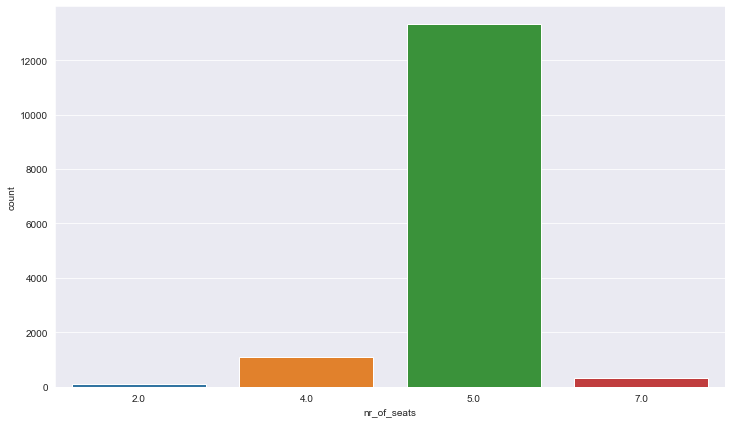

In [193]:
plt.figure(figsize = (12, 7))
sns.countplot(df.nr_of_seats);

## drive_chain

In [194]:
df.drive_chain.value_counts(dropna = False)

front    14621
4WD        184
rear         4
Name: drive_chain, dtype: int64

In [195]:
df["drive_chain"].replace('rear', 'front', inplace=True)

In [196]:
df.drive_chain.value_counts(dropna = False)

front    14625
4WD        184
Name: drive_chain, dtype: int64

## gears

In [197]:
df.gears.value_counts(dropna = False)

6.0     7762
5.0     4080
7.0     2737
8.0      216
9.0        6
1.0        2
3.0        2
4.0        2
2.0        1
50.0       1
Name: gears, dtype: int64

In [198]:
df["gears"].replace([1, 2, 3, 4, 9, 50], np.nan, inplace=True)

In [199]:
df.gears.value_counts(dropna = False)

6.0    7762
5.0    4080
7.0    2737
8.0     216
NaN      14
Name: gears, dtype: int64

In [200]:
df['gears'].fillna(df.groupby(['make', 'model', 'age', 'fuel', 'body_type'])['gears'].transform(lambda x: x.mode()[0]), inplace=True)

In [201]:
df.gears.value_counts(dropna = False)


6.0    7766
5.0    4083
7.0    2744
8.0     216
Name: gears, dtype: int64

In [202]:
plt.figure(figsize = (15, 8))

<Figure size 1080x576 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

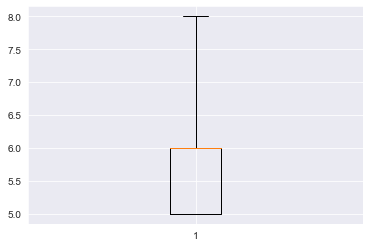

In [203]:
plt.boxplot(df.gears, whis=2.5);

## seat_cover

In [204]:
df['seat_cover'].value_counts(dropna=False)

Cloth           11982
Part leather     1390
Full leather     1320
Velour             60
alcantara          57
Name: seat_cover, dtype: int64

In [205]:
df['seat_cover'].replace(['Velour', 'alcantara'], 'Cloth', inplace = True)

In [206]:
df['seat_cover'].value_counts(dropna=False)

Cloth           12099
Part leather     1390
Full leather     1320
Name: seat_cover, dtype: int64

## consumption

In [207]:
df['consumption_comb(l/100_km)'].value_counts(dropna=False)

5.0     1647
4.0     1108
3.9      954
5.4      794
6.0      703
4.7      685
4.8      622
5.3      609
4.4      595
3.8      587
5.6      552
4.5      551
4.2      507
3.7      480
5.2      403
4.6      382
3.3      328
4.9      319
5.5      308
3.5      307
5.7      296
6.2      289
4.3      272
5.9      254
3.6      193
6.8      132
6.3      128
5.8      127
6.6      118
3.4      103
3.0       74
6.4       64
7.4       58
7.0       47
6.7       30
8.3       27
3.2       26
8.4       26
6.5       24
6.9       20
7.6       14
8.7       11
8.0        7
7.2        6
7.8        5
8.6        3
38.0       2
7.3        2
7.5        1
9.0        1
7.9        1
55.0       1
54.0       1
0.2        1
32.0       1
33.0       1
43.0       1
46.0       1
Name: consumption_comb(l/100_km), dtype: int64

In [208]:
df.loc[(df['consumption_comb(l/100_km)'] > 10), 'consumption_comb(l/100_km)'] = np.nan

In [209]:
df.loc[(df['consumption_comb(l/100_km)'] < 3), 'consumption_comb(l/100_km)'] = np.nan

In [210]:
df['consumption_comb(l/100_km)'].fillna(df.groupby(['make', 'model', 'age', 'fuel'])['consumption_comb(l/100_km)'].transform(lambda x: x.mode()[0]), inplace=True)

In [211]:
df['consumption_city(l/100_km)'].value_counts(dropna=False)

5.0     1533
4.0      788
4.5      722
5.8      635
5.4      625
        ... 
8.8        2
43.0       2
66.0       1
64.0       1
9.7        1
Name: consumption_city(l/100_km), Length: 69, dtype: int64

In [212]:
df.loc[(df['consumption_city(l/100_km)'] > 12), 'consumption_city(l/100_km)'] = np.nan

In [213]:
df.loc[(df['consumption_city(l/100_km)'] < 3), 'consumption_city(l/100_km)'] = np.nan

In [214]:
df['consumption_city(l/100_km)'].fillna(df.groupby(['make', 'model', 'age', 'fuel', 'body_type'])['consumption_city(l/100_km)'].transform(lambda x: x.mode()[0]), inplace=True)

In [215]:
df['consumption_country(l/100_km)'].value_counts(dropna=False)

4.2     1369
3.7     1343
4.0     1305
4.5     1240
4.4      932
3.9      872
3.8      810
4.7      723
4.9      703
3.3      636
3.0      626
4.6      525
3.6      516
3.5      513
4.3      413
3.4      351
5.3      344
4.8      283
5.0      272
5.7      208
5.4      176
3.2      158
5.6      127
5.2       80
6.3       48
6.0       33
5.5       30
5.8       30
6.9       28
6.6       27
2.9       16
6.4       15
2.8        9
7.7        8
7.2        8
7.0        5
6.5        4
44.0       4
7.3        4
35.0       2
37.0       2
6.7        2
5.9        2
7.8        2
2.0        1
8.0        1
8.6        1
7.6        1
42.0       1
Name: consumption_country(l/100_km), dtype: int64

In [216]:
df.loc[(df['consumption_country(l/100_km)'] > 12), 'consumption_country(l/100_km)'] = np.nan

In [217]:
df.loc[(df['consumption_country(l/100_km)'] < 2.5), 'consumption_country(l/100_km)'] = np.nan

In [218]:
df['consumption_country(l/100_km)'].fillna(df.groupby(['make', 'model', 'age', 'fuel', 'body_type'])['consumption_country(l/100_km)'].transform(lambda x: x.mode()[0]), inplace=True)

In [219]:
df['consumption_avg'] = (df['consumption_country(l/100_km)'] + df['consumption_city(l/100_km)'] + df['consumption_comb(l/100_km)']) / 3

In [220]:
df['consumption_avg'].sort_values().value_counts(dropna = False)

3.866667    666
4.700000    437
4.666667    434
5.166667    410
4.066667    378
           ... 
6.933333      1
7.233333      1
4.833333      1
7.133333      1
6.433333      1
Name: consumption_avg, Length: 189, dtype: int64

In [221]:
df.drop(['consumption_country(l/100_km)', 'consumption_city(l/100_km)', 'consumption_comb(l/100_km)'], axis=1, inplace = True)

## vat

In [222]:
df['vat'].value_counts(dropna=False)

VAT deductible      14354
Price negotiable      455
Name: vat, dtype: int64

In [223]:
df.shape

(14809, 29)

In [224]:
df.columns

Index(['make', 'model', 'age', 'short_description', 'body_type', 'price', 'km',
       'hp_kw', 'fuel', 'type', 'previous_owners', 'gearing_type',
       'displacement_in_cc', 'cylinders', 'weight', 'emission_class',
       'body_color', 'paint_type', 'nr_of_doors', 'nr_of_seats', 'drive_chain',
       'comfort_&_convenience', 'entertainment_&_media', 'extras',
       'safety_&_security', 'gears', 'seat_cover', 'vat', 'consumption_avg'],
      dtype='object')

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14809 entries, 0 to 14812
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   make                   14809 non-null  object 
 1   model                  14809 non-null  object 
 2   age                    14809 non-null  float64
 3   short_description      14765 non-null  object 
 4   body_type              14809 non-null  object 
 5   price                  14809 non-null  int64  
 6   km                     14809 non-null  float64
 7   hp_kw                  14809 non-null  float64
 8   fuel                   14809 non-null  object 
 9   type                   14809 non-null  object 
 10  previous_owners        14809 non-null  float64
 11  gearing_type           14809 non-null  object 
 12  displacement_in_cc     14761 non-null  float64
 13  cylinders              14809 non-null  float64
 14  weight                 14809 non-null  float64
 15  em

In [230]:
numeric_col = "price,km,gears,previous_owners,consumption_avg,displacement_in_cc,age,hp_kw,weight,cylinders,nr_of_doors,nr_of_seats".split(",")

In [231]:
df_num = df[numeric_col]

In [232]:
df_num

price            km  gears  previous_owners  consumption_avg  \
0      15770  56013.000000    7.0              2.0         3.866667   
1      14500  80000.000000    7.0              1.0         5.766667   
2      14640  83450.000000    7.0              1.0         3.866667   
3      14500  73000.000000    6.0              1.0         3.866667   
4      16790  16200.000000    7.0              1.0         4.133333   
...      ...           ...    ...              ...              ...   
14808  39950   1581.977876    6.0              1.0         5.400000   
14809  39885   9900.000000    7.0              1.0         6.633333   
14810  39875     15.000000    6.0              1.0         5.400000   
14811  39700     10.000000    6.0              1.0         5.400000   
14812  40999   1581.977876    7.0              1.0         7.066667   

       displacement_in_cc  age  hp_kw  weight  cylinders  nr_of_doors  \
0                  1422.0  4.0   66.0  1220.0        3.0          5.0   
1                  1798.0  3.0  141.0  1255.0        4.0          3.0   
2                  1598.0  4.0   85.0  1135.0        3.0          4.0   
3                  1422.0  4.0   66.0  1195.0        3.0          3.0   
4                  1422.0  4.0   66.0  1135.0        3.0          5.0   
...                   ...  ...    ...     ...        ...          ...   
14808              1997.0  1.0  147.0  1758.0        4.0          5.0   
14809              1798.0  1.0  165.0  1708.0        4.0          5.0   
14810              1997.0  1.0  146.0  1685.0        4.0          5.0   
14811              1997.0  1.0  147.0  1758.0        4.0          5.0   
14812              1798.0  1.0  165.0  1685.0        4.0          5.0   

       nr_of_seats  
0              5.0  
1              4.0  
2              4.0  
3              4.0  
4              5.0  
...            ...  
14808          5.0  
14809          5.0  
14810          7.0  
14811          7.0  
14812          5.0  

[14809 rows x 12 columns]

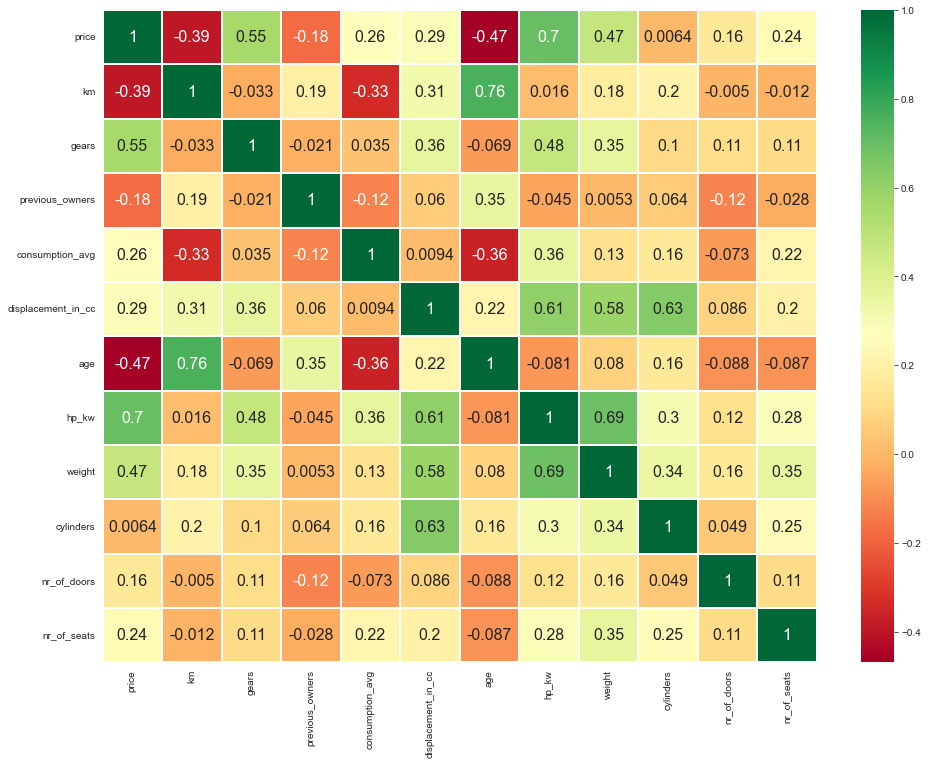

In [233]:
plt.figure(figsize=(16, 12))

sns.heatmap(df_num.corr(), annot=True, cmap="RdYlGn", linewidths=0.2, annot_kws={"size": 16});

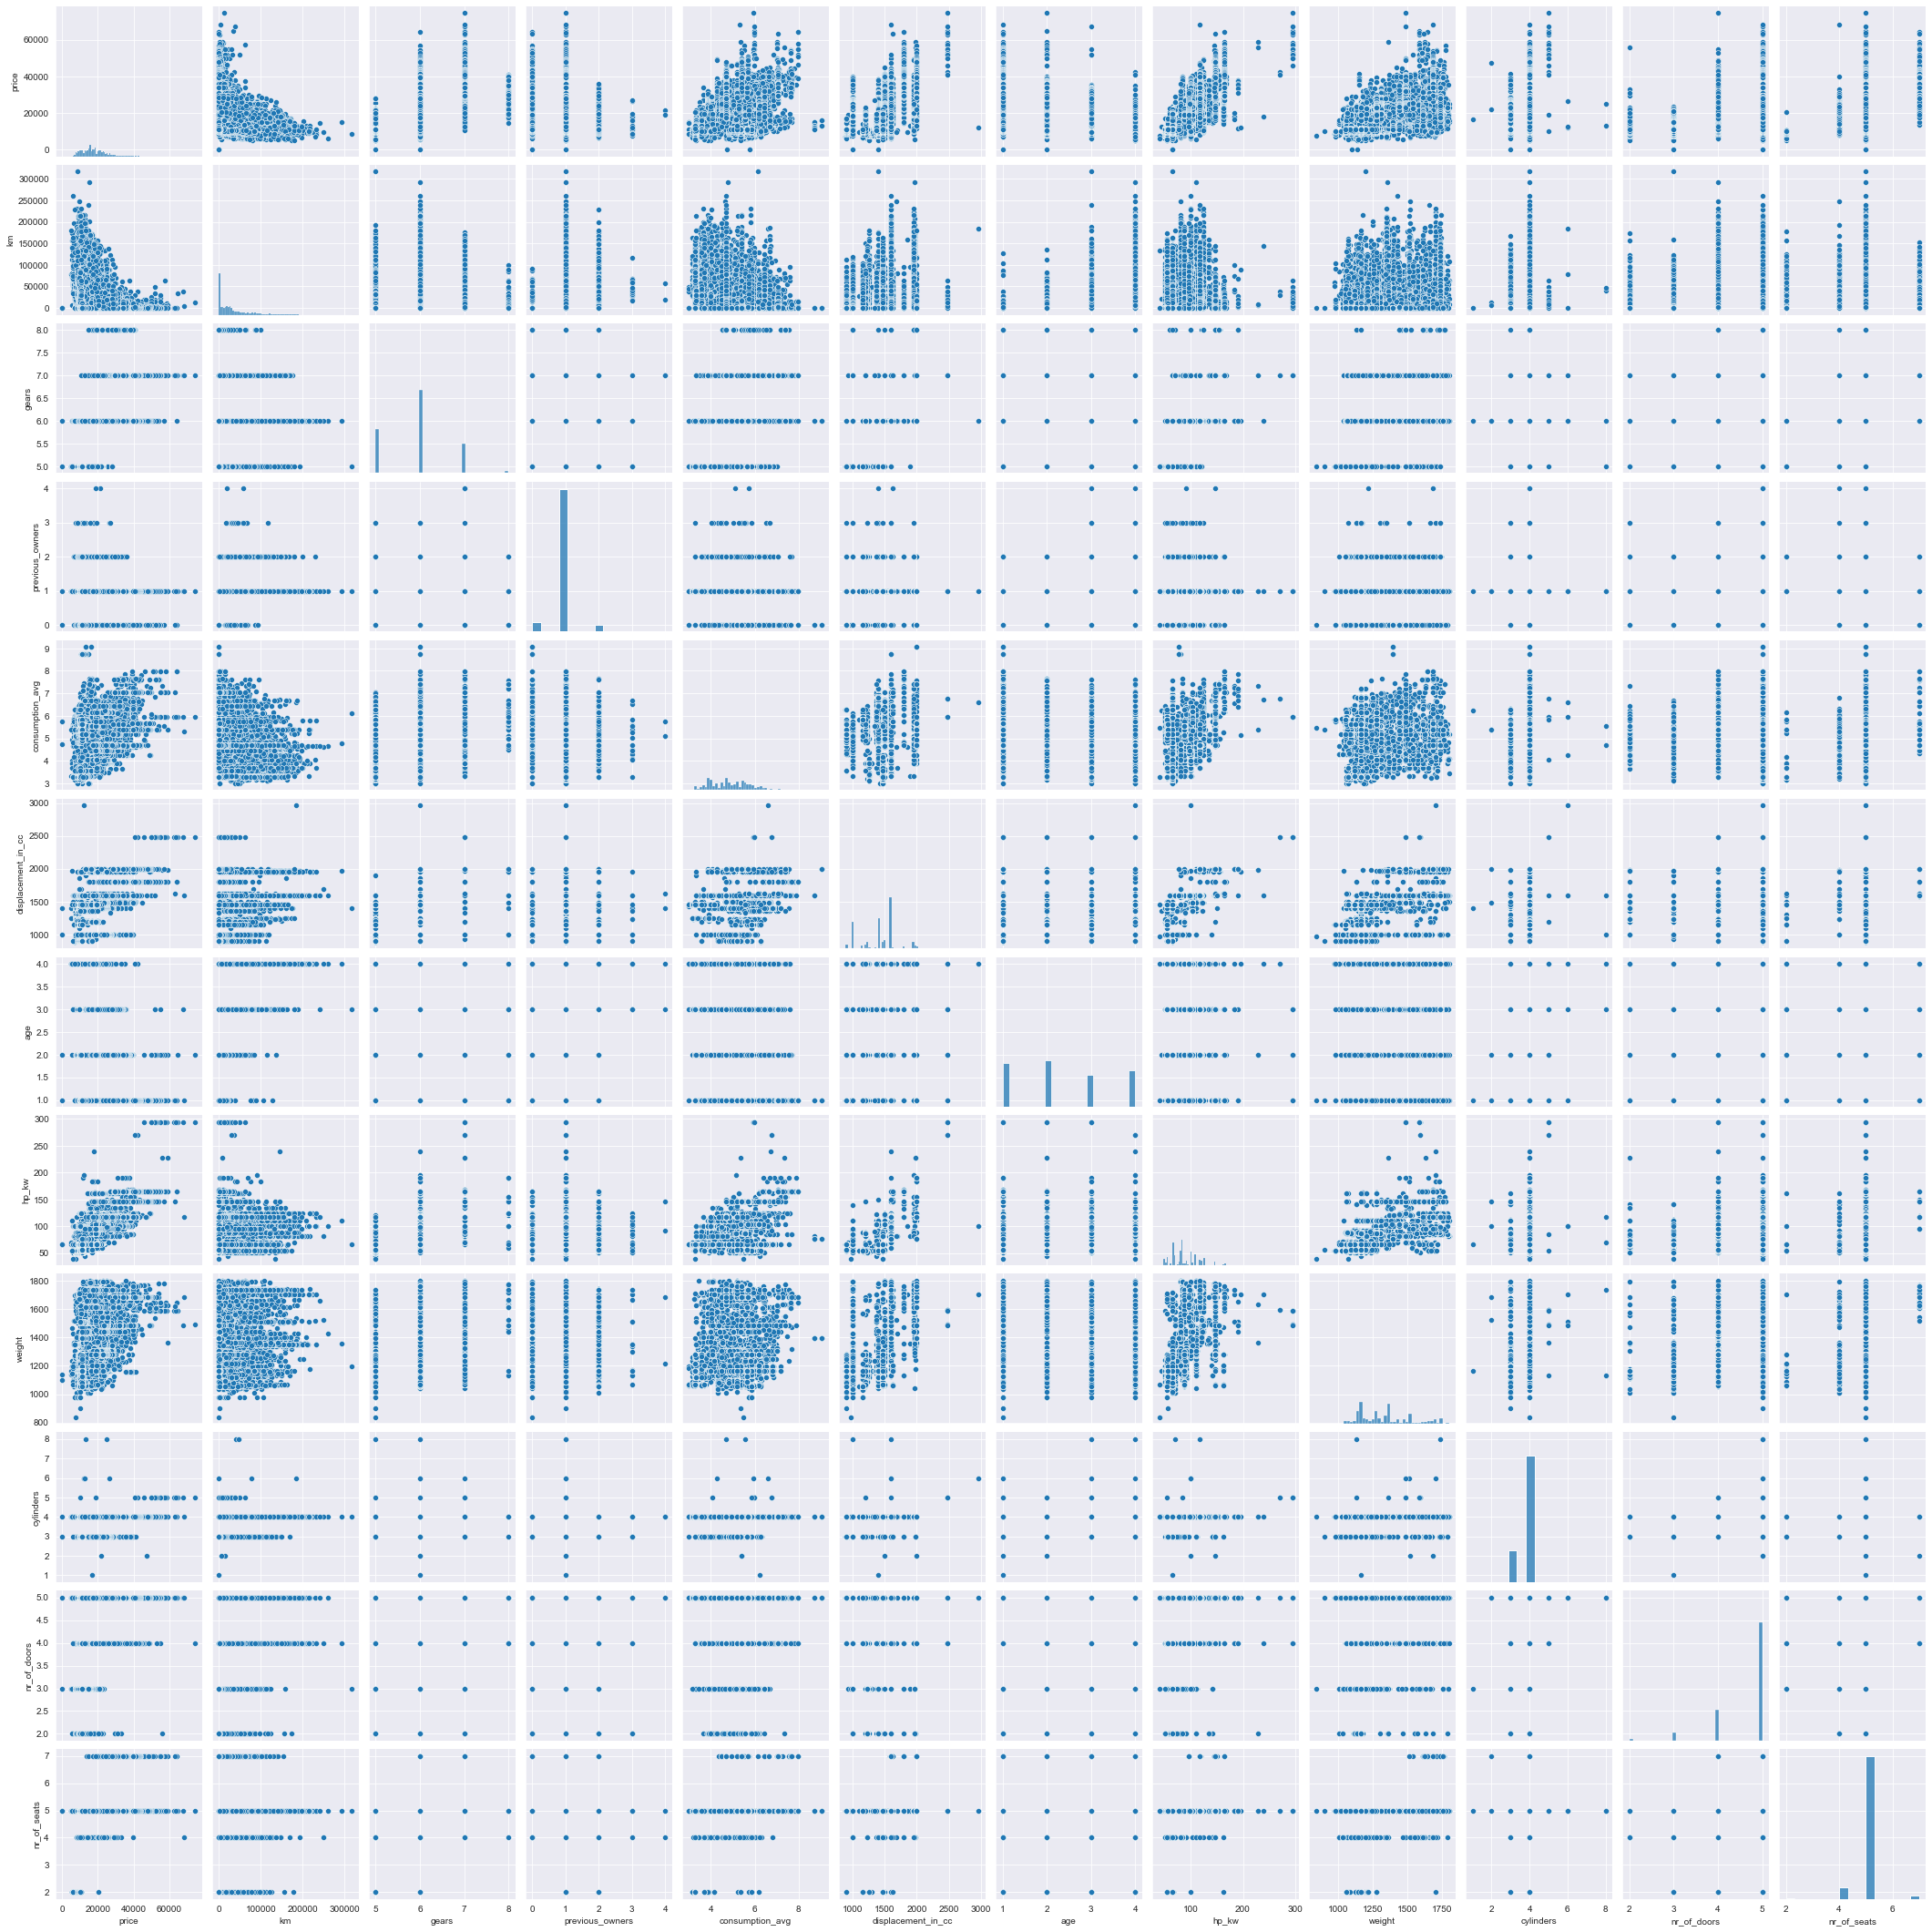

In [234]:
sns.pairplot(df_num, size=2.5)
plt.show()

In [248]:
df.make + '_' + df.model

0               Audi_A1
1               Audi_A1
2               Audi_A1
3               Audi_A1
4               Audi_A1
              ...      
14808    Renault_Espace
14809    Renault_Espace
14810    Renault_Espace
14811    Renault_Espace
14812    Renault_Espace
Length: 14809, dtype: object

In [249]:
df['make_model']= df.make + '_' + df.model

In [250]:
df.drop(['make', 'model'], axis= 1 , inplace= True)

In [251]:
df['make_model']

0               Audi_A1
1               Audi_A1
2               Audi_A1
3               Audi_A1
4               Audi_A1
              ...      
14808    Renault_Espace
14809    Renault_Espace
14810    Renault_Espace
14811    Renault_Espace
14812    Renault_Espace
Name: make_model, Length: 14809, dtype: object

In [252]:
df.shape

(14809, 173)

# get_dummies

In [235]:
df1= df.copy()

In [236]:
df_extras = df1['extras'].str.get_dummies(sep=',').add_prefix('ex_')

In [237]:
df_extras.sum()

ex_ 'Cab or rented Car'        252
ex_ 'Catalytic Converter'     1748
ex_ 'Handicapped enabled'       51
ex_ 'Right hand drive'           3
ex_ 'Roof rack'               1992
ex_ 'Shift paddles'            445
ex_ 'Ski bag'                  233
ex_ 'Sliding door'               3
ex_ 'Sport package'           1110
ex_ 'Sport seats'             2852
ex_ 'Sport suspension'        1460
ex_ 'Touch screen'            3589
ex_ 'Trailer hitch'            608
ex_ 'Tuned car'                 12
ex_ 'Voice Control'           3997
ex_ 'Winter tyres'             234
ex_'Alloy wheels'            10576
ex_'Cab or rented Car'          58
ex_'Catalytic Converter'       427
ex_'Handicapped enabled'         1
ex_'Roof rack'                 554
ex_'Shift paddles'               9
ex_'Ski bag'                    11
ex_'Sport package'              19
ex_'Sport seats'                82
ex_'Sport suspension'           31
ex_'Touch screen'              268
ex_'Trailer hitch'              31
ex_'Tuned car'      

In [238]:
df_em = df1['entertainment_&_media'].str.get_dummies(sep=',').add_prefix('em_')

In [239]:
df_em.sum()

em_ 'CD player'                3890
em_ 'Digital radio'            1955
em_ 'Hands-free equipment'     8504
em_ 'MP3'                      5450
em_ 'On-board computer'       10205
em_ 'Radio'                   10823
em_ 'Sound system'             2051
em_ 'Television'                 35
em_ 'USB'                      7601
em_'Bluetooth'                10920
em_'CD player'                  649
em_'Digital radio'              164
em_'Hands-free equipment'       231
em_'MP3'                        133
em_'On-board computer'          986
em_'Radio'                      480
em_'Sound system'                26
em_'USB'                         44
dtype: int64

In [240]:
df_cc = df1['comfort_&_convenience'].str.get_dummies(sep=',').add_prefix('cc_')

In [241]:
df_cc.sum()

cc_ 'Armrest'                                    2
cc_ 'Auxiliary heating'                          2
cc_ 'Cruise control'                            65
cc_ 'Electric tailgate'                         18
cc_ 'Electrical side mirrors'                  204
cc_ 'Electrically adjustable seats'             30
cc_ 'Electrically heated windshield'            19
cc_ 'Heads-up display'                          20
cc_ 'Heated steering wheel'                     20
cc_ 'Hill Holder'                              145
cc_ 'Keyless central door lock'                 52
cc_ 'Leather seats'                              1
cc_ 'Leather steering wheel'                   125
cc_ 'Light sensor'                              83
cc_ 'Lumbar support'                            60
cc_ 'Massage seats'                             16
cc_ 'Multi-function steering wheel'            182
cc_ 'Navigation system'                        137
cc_ 'Panorama roof'                             27
cc_ 'Park Distance Control'    

In [242]:
df_ss = df1['safety_&_security'].str.get_dummies(sep=',').add_prefix('ss_')

In [243]:
df_ss.sum()

ss_ 'Adaptive Cruise Control'                   1229
ss_ 'Adaptive headlights'                       1889
ss_ 'Alarm system'                              1798
ss_ 'Blind spot monitor'                        1233
ss_ 'Central door lock with remote control'     2372
ss_ 'Central door lock'                        11669
ss_ 'Daytime running lights'                    9616
ss_ 'Driver drowsiness detection'                480
ss_ 'Driver-side airbag'                       13090
ss_ 'Electronic stability control'             12294
ss_ 'Emergency brake assistant'                 2997
ss_ 'Emergency system'                          1517
ss_ 'Fog lights'                                7790
ss_ 'Head airbag'                               2172
ss_ 'Immobilizer'                               9926
ss_ 'Isofix'                                   10971
ss_ 'LED Daytime Running Lights'                5174
ss_ 'LED Headlights'                            2828
ss_ 'Lane departure warning system'           

In [244]:
df = df1.join([df_cc,df_ss,df_extras,df_em])

In [245]:
df.drop(['comfort_&_convenience','entertainment_&_media', 'extras', 'safety_&_security', 'short_description'], axis=1, inplace=True)

In [246]:
df.shape

(14809, 174)

In [253]:
df_final = pd.get_dummies(df, drop_first=True)

In [254]:
df_final.shape

(14809, 192)

In [255]:
df_final.head().T

0        1        2        3        4
age                            4.0      3.0      4.0      4.0      4.0
price                      15770.0  14500.0  14640.0  14500.0  16790.0
km                         56013.0  80000.0  83450.0  73000.0  16200.0
hp_kw                         66.0    141.0     85.0     66.0     66.0
previous_owners                2.0      1.0      1.0      1.0      1.0
...                            ...      ...      ...      ...      ...
make_model_Opel_Corsa          0.0      0.0      0.0      0.0      0.0
make_model_Opel_Insignia       0.0      0.0      0.0      0.0      0.0
make_model_Renault_Clio        0.0      0.0      0.0      0.0      0.0
make_model_Renault_Duster      0.0      0.0      0.0      0.0      0.0
make_model_Renault_Espace      0.0      0.0      0.0      0.0      0.0

[192 rows x 5 columns]

In [256]:
# function for set text color of correlation values in Dataframes

def color_correlation(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.6 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.6 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'cyan'    
    else:
        color = 'black'
    return 'color: %s' % color
 
df_final.corr().style.applymap(color_correlation)

In [258]:
df.tail()

age body_type  price           km  hp_kw     fuel            type  \
14808  1.0       Van  39950  1581.977876  147.0   Diesel             New   
14809  1.0       Van  39885  9900.000000  165.0  Benzine            Used   
14810  1.0       Van  39875    15.000000  146.0   Diesel  Pre-registered   
14811  1.0       Van  39700    10.000000  147.0   Diesel  Pre-registered   
14812  1.0       Van  40999  1581.977876  165.0  Benzine   Demonstration   

       previous_owners gearing_type  displacement_in_cc  ...  em_'Bluetooth'  \
14808              1.0    Automatic              1997.0  ...               1   
14809              1.0    Automatic              1798.0  ...               1   
14810              1.0    Automatic              1997.0  ...               1   
14811              1.0    Automatic              1997.0  ...               1   
14812              1.0    Automatic              1798.0  ...               0   

       em_'CD player' em_'Digital radio' em_'Hands-free equipment' em_'MP3'  \
14808               0                  0                         0        0   
14809               0                  0                         0        0   
14810               0                  0                         0        0   
14811               0                  0                         0        0   
14812               0                  0                         0        0   

       em_'On-board computer'  em_'Radio' em_'Sound system'  em_'USB'  \
14808                       0           0                 0         0   
14809                       0           0                 0         0   
14810                       0           0                 0         0   
14811                       0           0                 0         0   
14812                       0           0                 0         1   

           make_model  
14808  Renault_Espace  
14809  Renault_Espace  
14810  Renault_Espace  
14811  Renault_Espace  
14812  Renault_Espace  

[5 rows x 173 columns]

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14809 entries, 0 to 14812
Columns: 173 entries, age to make_model
dtypes: float64(11), int64(151), object(11)
memory usage: 20.2+ MB


In [260]:
df.reset_index(drop=True, inplace=True)

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14809 entries, 0 to 14808
Columns: 173 entries, age to make_model
dtypes: float64(11), int64(151), object(11)
memory usage: 19.5+ MB


In [262]:
df_final.to_csv("final_auto_scout.csv", index=False)